<a href="https://colab.research.google.com/github/andreadosi1986/PrismaSVDUNet/blob/master/ProgettoCariocaSardiniaFullPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.8 MB/s 


In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from matplotlib import rc
#import rasterio
#from rasterio import mask
#import fiona
#import skimage
#from skimage.measure import regionprops
import random
import pandas as pd
from skimage import filters
import patchify
import tifffile as tiff
import tensorflow as tf
import keras
from scipy.ndimage import rotate
from patchify import patchify, unpatchify
#import fiona
#from rasterio.plot import reshape_as_image
import tensorflow.keras.utils

In [ ]:
X_test = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/X_test4classes3SingVal.npy')
y_test_cat = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/y_test_cat4classes3SingVal.npy')
y_test = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/y_test4classes3SingVal.npy')

In [ ]:
model_saved =  keras.models.load_model('/content/drive/MyDrive/datamining/prisma/Sardinia/deepUNet_200Ep4Classes3ChannelsWithNoise2',compile=False)


In [ ]:
prediction = model_saved.predict(X_test)

In [ ]:
#IOU
y_pred=prediction
y_pred_argmax=np.argmax(y_pred, axis=3)

In [ ]:
##################################################

#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])
#class5_IoU = values[4,4]/(values[4,4] + values[4,0] + values[4,1] + values[4,2] + values[0,4]+ values[1,4]+ values[2,4])
#class6_IoU = values[5,5]/(values[5,5] + values[5,0] + values[5,1] + values[5,2] + values[0,5]+ values[1,5]+ values[2,5])

print("IoU for background is: ", class1_IoU)
print("IoU for mining area: ", class2_IoU)
print("IoU for vegetations is: ", class3_IoU)
print("IoU for water is: ", class4_IoU)
#print("IoU for sparse veg is: ", class5_IoU)
#print("IoU for urban area is: ", class6_IoU)


#plt.imshow(train_images[0, :,:,0], cmap='gray')
#plt.imshow(train_masks[0, :,:,0], cmap='gray')
#######################################################################

Mean IoU = 0.9684681
[[1.3697280e+06 2.1000000e+01 4.8877000e+04 4.2150000e+03]
 [1.8000000e+01 4.4532100e+05 1.1553000e+04 2.9000000e+01]
 [3.5625000e+04 8.6310000e+03 1.0577944e+07 1.3970000e+04]
 [2.8490000e+03 1.0200000e+02 1.3248000e+04 4.6055330e+06]]
IoU for background is:  0.9373141
IoU for mining area:  0.9562914
IoU for vegetations is:  0.98768383
IoU for water is:  0.99258333


In [ ]:
sardinia_im = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/Sardinia3Channels.npy')
sardinia_mask = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaMask3Channels.npy')

In [ ]:
patches = patchify(sardinia_im, (128,128,3), 128)

In [ ]:
patches.shape

(6, 2, 1, 128, 128, 3)

In [ ]:
patches_res = patches.reshape(patches.shape[0] * patches.shape[1], patches.shape[3], patches.shape[4], patches.shape[5])

In [ ]:
prediction = model_saved.predict(patches_res)

In [ ]:
prediction.shape

(12, 128, 128, 4)

In [ ]:
predict = []
for i in range (prediction.shape[0]):
  predicted_img=np.argmax(prediction, axis=3)[i,:,:]
  predict.append(predicted_img)
prd = np.array(predict)

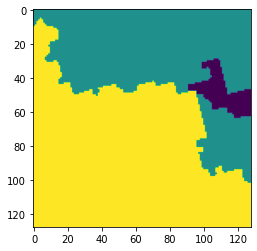

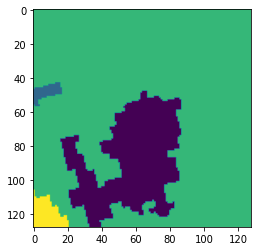

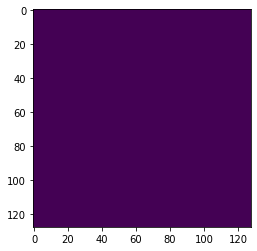

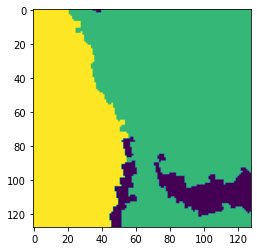

In [ ]:
for i in range (4):  
  plt.imshow(prd[i])
  plt.show()

In [ ]:
sardinia_patches = prd.reshape(6, 2, 128, 128)

In [ ]:
unpatched_prediction = unpatchify(sardinia_patches, (6*128, 2*128))

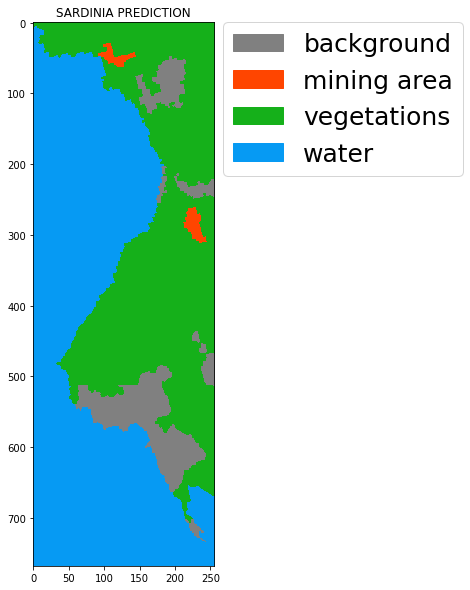

In [ ]:
import matplotlib.patches as mpatches
values = np.unique(unpatched_prediction)
label = ["background","mining area", "vegetations", "water"]
colors = ['gray', '#FF4500', '#15B01A', '#069AF3']
bounds = [0,1,2,3,4]

cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(20,10))
im_gr_tr = plt.imshow(unpatched_prediction, interpolation='none', cmap=cmap, norm=norm)

colors = [im_gr_tr.cmap(im_gr_tr.norm(value)) for value in values]

patches = [ mpatches.Patch(color=colors[i], label=label[i])  for i in range(len(values))]
plt.title('SARDINIA PREDICTION')
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 25}, borderaxespad=0. )
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Sardinia/FullPredictionNew.pdf",format = 'pdf', bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/datamining/prisma/Sardinia/FullPredictionNew.png",format = 'png', bbox_inches='tight')

plt.show()

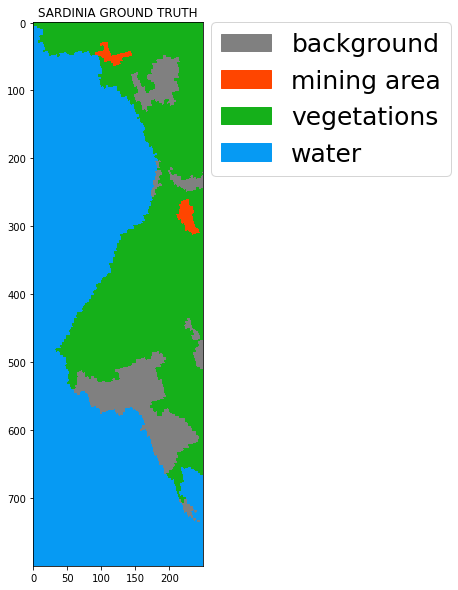

In [ ]:
import matplotlib.patches as mpatches
values = np.unique(sardinia_mask)

label = ["background","mining area", "vegetations", "water"]
colors = ['gray', '#FF4500', '#15B01A', '#069AF3']
bounds = [0,1,2,3,4]

cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(20,10))
im_gr_tr = plt.imshow(sardinia_mask[:,:250], interpolation='none', cmap=cmap, norm=norm)

colors = [im_gr_tr.cmap(im_gr_tr.norm(value)) for value in values]

patches = [ mpatches.Patch(color=colors[i], label=label[i])  for i in range(len(values))]
plt.title('SARDINIA GROUND TRUTH')
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 25}, borderaxespad=0. )
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaGroundTruthNew.pdf", format = 'pdf', bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaGroundTruthNew.png", format = 'png', bbox_inches='tight')

plt.show()